# import the libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"training data shape is: {train_images.shape}, test_images shape is: {test_images.shape}")



training data shape is: (60000, 28, 28), test_images shape is: (10000, 28, 28)


# plotting handwritten numbers from dataset

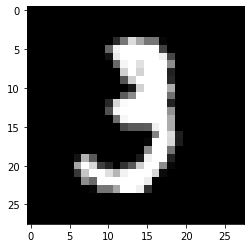

In [3]:

def display_image(imag_indx):
    image = imag_indx
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

display_image(train_images[10])


In [4]:
train_labels[10]

3

# Reshaping

In [5]:
dim4 = 4
dim7 = 7
dim2 = 2

In [6]:
def grid(imag, row, col):
    x, y = imag.shape
    
    assert x % row == 0, "can't divide {} by {}".format(x, row) # assert --> zy if condition bs bytl3 assertion error lw el value be false
    assert y % col == 0, "can't divide {} by {}".format(y, col)
    
    ans = (imag.reshape ( x //row, row, -1, col).transpose().reshape(-1, row, col))
    
    return ans


In [7]:
print(grid(train_images[10], dim4, dim4).shape)
grid(train_images[22], dim4, dim4)

(49, 4, 4)


array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   6,  63],
        [227, 230,   4,   0],
        [  0, 103,   5, 167]],

       [[250,   0,   0,   0],
        [234,   0,   1, 223],
        [  0,   0,   0, 212],
        [  0,  64,  45,   0]],

       [[  0,   0,  16,  90],
        [111,   0,   0,   0],
        [  0,   0, 233,   8],
        [  0,   0,   0, 144]],

       [[  0, 253,   0, 

# get centroids

In [8]:
def centroidz(img, newdim):    # return feature vector

    
    centroids = []
 
    for g in grid(img , newdim , newdim ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(g): # np.ndenumerate to get dimensions of each submatrix
          sum+= x 
          Xc += x * index[0] # x --> axis
          Yc += x * index[1] # y --> axis
        
        if sum != 0 :
            centroids.append( Xc/ sum )
            centroids.append(Yc/ sum )
        else :
             centroids.append(0)
             centroids.append(0)
        
    
    return np.array(centroids)

## Creating Test , Train Features vector

In [9]:
print("Feature Extraction From Training Data")
train_features4 = [centroidz(img, dim4)  for img in train_images  ]
train_features2 = [centroidz(img, dim2)  for img in train_images  ]
train_features7 = [centroidz(img, dim7)  for img in train_images  ]

Feature Extraction From Training Data


In [10]:
train_features2 = np.array(train_features2)
train_features4 = np.array(train_features4)
train_features7 = np.array(train_features7)
print(train_features4.shape)

(60000, 98)


In [11]:
train_features4[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        2.        , 2.32304527, 2.        , 2.04237288, 2.20847458,
        1.45529801, 1.75993377, 1.26571251, 1.76664592, 1.57973422,
        1.46594684, 1.05857741, 1.15313808, 1.52989691, 1.96907216,
        0.        , 2.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 2.        ,
        2.59529412, 2.        , 1.75909091, 1.95909091, 1.6       ,
        2.        , 1.44294547, 1.79201799, 1.98636037, 1.26058866,
        1.7283237 , 1.54552023, 2.48692153, 1.46076459, 1.        ,
        2.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.        , 2.        , 2.85245902,
        2.07377049, 1.56865128, 1.43742406, 1.52042802, 2.31225681,
        1.71428571, 1.48295867, 1.47325581, 0.95232558, 1.03515625,
        2.10058594, 1.14528594, 0.38639876, 0.33333333, 2.83333333,
        0.        , 0.        , 0.        , 0.  

In [12]:
print("Feature Extraction From Test Data")
test_features4 = [centroidz(img, dim4)  for img in test_images  ]
test_features7 = [centroidz(img, dim7)  for img in test_images  ]
test_features2 = [centroidz(img, dim2)  for img in test_images  ]


Feature Extraction From Test Data


In [13]:
test_features4 = np.array(test_features4)
test_features7 = np.array(test_features7)
test_features2 = np.array(test_features2)
print(test_features4.shape)

(10000, 98)


In [14]:
test_features4[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.        , 2.        , 2.06493506, 1.68831169,
        2.07898449, 1.63751763, 1.40556088, 1.37488015, 1.32769556,
        1.52959831, 1.47821351, 1.40958606, 1.92028986, 0.61956522,
        0.        , 3.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.        , 2.        , 1.        , 1.        , 2.19230769,
        1.74813896, 1.08028455, 1.22560976, 1.84254992, 1.56912442,
        1.82067851, 0.58642973, 1.45833333, 1.27083333, 0.14516129,
        0.43548387, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.46366782, 1.76816609, 2.        ,
        2.        , 1.25208681, 1.52587646, 2.04485488, 1.36147757,
        1.45184518, 1.03240324, 1.71784777, 1.86351706, 0.95005945,
        1.4744352 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

# "KNN" Classification algorithm

In [15]:
def KNN(train_features, test_features, train_labels, func, nn):
    
    knn = KNeighborsClassifier(nn, metric=func)
    knn.fit(train_features, train_labels)  # fit train data
    prediction = knn.predict(test_features)  # test data
    return prediction

## knn for 4x4 metrix

In [16]:
Knn_prediction4_1 = KNN(train_features4, test_features4 , train_labels, 'euclidean',10 )

In [17]:
Knn_prediction4_2 = KNN(train_features4, test_features4 , train_labels, 'euclidean',7 )

In [18]:
Knn_prediction4_3 = KNN(train_features4, test_features4 , train_labels, 'minkowski',10 )

In [19]:
Knn_prediction4_4 = KNN(train_features4, test_features4 , train_labels, 'minkowski',7 )

In [20]:
Knn_prediction4_5 = KNN(train_features4, test_features4 , train_labels, 'euclidean',20 )

In [54]:
Knn_prediction4_6 = KNN(train_features4, test_features4 , train_labels, 'minkowski',20 )

## knn for 2x2 metrix

In [22]:
Knn_prediction2_1 = KNN(train_features2, test_features2 , train_labels, 'euclidean',10 )

In [23]:
Knn_prediction2_2 = KNN(train_features2, test_features2 , train_labels, 'euclidean',7 )

In [24]:
Knn_prediction2_3 = KNN(train_features2, test_features2 , train_labels, 'minkowski',10 )

In [25]:
Knn_prediction2_4 = KNN(train_features2, test_features2 , train_labels, 'minkowski',7 )

In [26]:
Knn_prediction2_5 = KNN(train_features2, test_features2 , train_labels, 'euclidean',20 )

In [27]:
Knn_prediction2_6 = KNN(train_features2, test_features2 , train_labels, 'minkowski',20 )

## knn for 7x7 metrix

In [28]:
Knn_prediction7_1 = KNN(train_features7, test_features7 , train_labels, 'euclidean',10 )

In [29]:
Knn_prediction7_2 = KNN(train_features7, test_features7 , train_labels, 'euclidean',7 )

In [30]:
Knn_prediction7_3 = KNN(train_features7, test_features7 , train_labels, 'minkowski',10 )

In [31]:
Knn_prediction7_4 = KNN(train_features7, test_features7 , train_labels, 'minkowski',7 )

In [32]:
Knn_prediction7_5 = KNN(train_features7, test_features7 , train_labels, 'euclidean',20 )

In [33]:
Knn_prediction7_6 = KNN(train_features7, test_features7 , train_labels, 'minkowski',20 )

# Accuracy 

## accuray for 4x4 metrix

In [34]:
print("Accuracy Score =", accuracy_score(test_labels, Knn_prediction4_1) * 100, "%")

Accuracy Score = 80.57 %


In [35]:
print("Accuracy Score2 =", accuracy_score(test_labels, Knn_prediction4_2) * 100, "%")

Accuracy Score2 = 81.06 %


In [36]:
print("Accuracy Score3 =", accuracy_score(test_labels, Knn_prediction4_3) * 100, "%")

Accuracy Score3 = 80.57 %


In [37]:
print("Accuracy Score3 =", accuracy_score(test_labels, Knn_prediction4_4) * 100, "%")

Accuracy Score3 = 81.06 %


In [38]:
print("Accuracy Score4 =", accuracy_score(test_labels, Knn_prediction4_5) * 100, "%")

Accuracy Score4 = 78.59 %


In [55]:
print("Accuracy Score5 =", accuracy_score(test_labels, Knn_prediction4_6) * 100, "%")

Accuracy Score5 = 78.59 %


## accuracy for 2x2 metrix

In [40]:
print("Accuracy Score1 =", accuracy_score(test_labels, Knn_prediction2_1) * 100, "%")

Accuracy Score1 = 92.72 %


In [41]:
print("Accuracy Score2 =", accuracy_score(test_labels, Knn_prediction2_2) * 100, "%")

Accuracy Score2 = 92.73 %


In [42]:
print("Accuracy Score3 =", accuracy_score(test_labels, Knn_prediction2_3) * 100, "%")

Accuracy Score3 = 92.72 %


In [43]:
print("Accuracy Score4 =", accuracy_score(test_labels, Knn_prediction2_4) * 100, "%")

Accuracy Score4 = 92.73 %


In [44]:
print("Accuracy Score5 =", accuracy_score(test_labels, Knn_prediction2_5) * 100, "%")

Accuracy Score5 = 91.97999999999999 %


In [45]:
print("Accuracy Score6 =", accuracy_score(test_labels, Knn_prediction2_6) * 100, "%")

Accuracy Score6 = 91.97999999999999 %


## accuracy for 7x7 metrix

In [46]:
print("Accuracy Score1 =", accuracy_score(test_labels, Knn_prediction7_1) * 100, "%")

Accuracy Score1 = 75.03999999999999 %


In [47]:
print("Accuracy Score2 =", accuracy_score(test_labels, Knn_prediction7_2) * 100, "%")

Accuracy Score2 = 75.35 %


In [48]:
print("Accuracy Score3 =", accuracy_score(test_labels, Knn_prediction7_3) * 100, "%")

Accuracy Score3 = 75.03999999999999 %


In [49]:
print("Accuracy Score4 =", accuracy_score(test_labels, Knn_prediction7_4) * 100, "%")

Accuracy Score4 = 75.35 %


In [50]:
print("Accuracy Score5 =", accuracy_score(test_labels, Knn_prediction7_5) * 100, "%")

Accuracy Score5 = 73.61999999999999 %


In [51]:
print("Accuracy Score6 =", accuracy_score(test_labels, Knn_prediction7_6) * 100, "%")

Accuracy Score6 = 73.61999999999999 %
